In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing


# Preparing Data

In [2]:
#Original Dataset do not have column names so we need to assign it.
col_names=['IDENTIF','RIVER','LOCATION',
            'ERECTED','PURPOSE','LENGTH',
            'LANES','CLEAR-G','T-OR-D',
            'MATERIAL','SPAN','REL-L','TYPE']


In [3]:
df=pd.read_csv("bridges.csv", names=col_names)

In [223]:
df.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
IDENTIF     108 non-null object
RIVER       108 non-null object
LOCATION    108 non-null object
ERECTED     108 non-null int64
PURPOSE     108 non-null object
LENGTH      108 non-null object
LANES       108 non-null object
CLEAR-G     108 non-null object
T-OR-D      108 non-null object
MATERIAL    108 non-null object
SPAN        108 non-null object
REL-L       108 non-null object
TYPE        108 non-null object
dtypes: int64(1), object(12)
memory usage: 11.0+ KB


Missing values is represented by "?"

In [225]:
df.isnull().any()

IDENTIF     False
RIVER       False
LOCATION    False
ERECTED     False
PURPOSE     False
LENGTH      False
LANES       False
CLEAR-G     False
T-OR-D      False
MATERIAL    False
SPAN        False
REL-L       False
TYPE        False
dtype: bool

In [226]:
#converting "?" into NaN for easy identification
df.replace('?',np.NaN,inplace=True)
print(df.isnull().sum())

IDENTIF      0
RIVER        0
LOCATION     1
ERECTED      0
PURPOSE      0
LENGTH      27
LANES       16
CLEAR-G      2
T-OR-D       6
MATERIAL     2
SPAN        16
REL-L        5
TYPE         2
dtype: int64


In [227]:
df.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3,1818,HIGHWAY,NaN,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,NaN,1,N,THROUGH,WOOD,NaN,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,NaN,2,N,THROUGH,WOOD,NaN,S,WOOD


In [228]:
df=df.drop('IDENTIF',axis=1)

In [229]:
#removing null val
df['LENGTH']=df['LENGTH'].fillna(df.mean(axis=1))

In [230]:
df['LOCATION']=df['LOCATION'].fillna(df['LOCATION'].head().mean())

In [231]:
scaler = preprocessing.StandardScaler()
df[['LOCATION','LENGTH','ERECTED']] = scaler.fit_transform(df[['LOCATION','LENGTH','ERECTED']])

In [232]:
df.replace(np.NaN,'none',inplace=True)

In [233]:
#LabelEncoding for type object
from sklearn.preprocessing import LabelEncoder
df1=df[['RIVER','PURPOSE','LANES','CLEAR-G','T-OR-D','MATERIAL','SPAN','REL-L','TYPE']].apply(LabelEncoder().fit_transform)

In [234]:
df1 = pd.concat([df[['LOCATION','LENGTH','ERECTED']],df1],axis=1)


In [235]:
df1.head()

,LOCATION,LENGTH,ERECTED,RIVER,PURPOSE,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,-0.096677,0.257712,-2.359786,1,1,1,1,1,2,2,1,6
1,-0.096674,-0.927989,-2.332759,0,1,1,1,1,2,2,1,6
2,-0.096672,0.274412,-2.062498,0,0,0,1,1,2,3,1,6
3,-0.096673,-0.984162,-1.846288,0,1,1,1,1,2,2,1,6
4,-0.096674,0.288075,-1.819262,1,1,1,1,1,2,3,1,6


In [236]:
df1['TYPE'].unique()

array([6, 5, 4, 0, 1, 3, 2, 7], dtype=int64)

### Train-Test Split

In [237]:
X=df1.drop('TYPE',axis=1)
Y=df1['TYPE']

In [238]:
from sklearn.model_selection import train_test_split


In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


# Choosing Model, Training and Evaluation(Confusion Matrix)

## Naive Bayes

In [240]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Performing training
gnb.fit(X_train, y_train)
y_pred_NB = gnb.predict(X_test)

In [241]:
gnb.score(X_train,y_train)

0.5370370370370371

In [242]:
print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred_NB))
print ("Accuracy : ",
    accuracy_score(y_test,y_pred_NB)*100)

nb_score=accuracy_score(y_test,y_pred_NB)*100

print("Report : \n",
    classification_report(y_test, y_pred_NB))

Confusion Matrix: 
 [[ 6  1  0  0  0  0]
 [ 1  2  1  0  0  0]
 [ 1  1  1  0  0  0]
 [ 6 16  0  2  2  0]
 [ 1  1  0  1  2  0]
 [ 0  0  0  0  0  9]]
Accuracy :  40.74074074074074
Report : 
               precision    recall  f1-score   support

           0       0.40      0.86      0.55         7
           1       0.10      0.50      0.16         4
           2       0.50      0.33      0.40         3
           4       0.67      0.08      0.14        26
           5       0.50      0.40      0.44         5
           6       1.00      1.00      1.00         9

    accuracy                           0.41        54
   macro avg       0.53      0.53      0.45        54
weighted avg       0.62      0.41      0.38        54



In [243]:
nb_cv = np.mean(cross_val_score(gnb, X, Y,cv=10) * 100)
print(nb_cv)

32.15229215229215


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


## Decision Tree

In [244]:
from sklearn.tree import DecisionTreeClassifier
dtree_score=[0,0]
dtree_cv=[0,0]

In [245]:
#perform training with giniIndex.
# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
# Performing training
clf_gini.fit(X_train, y_train)
y_pred_DT_gini = clf_gini.predict(X_test)

In [246]:
clf_gini.score(X_train,y_train)

0.6296296296296297

In [247]:
print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred_DT_gini))
print ("Accuracy : ",
    accuracy_score(y_test,y_pred_DT_gini)*100)

dtree_score[0]=accuracy_score(y_test,y_pred_DT_gini)*100

print("Report : \n",
    classification_report(y_test, y_pred_DT_gini))

Confusion Matrix: 
 [[ 5  0  1  1  0  0]
 [ 1  0  2  1  0  0]
 [ 1  0  2  0  0  0]
 [ 4  0  0 22  0  0]
 [ 2  0  0  3  0  0]
 [ 0  0  0  0  0  9]]
Accuracy :  70.37037037037037
Report : 
               precision    recall  f1-score   support

           0       0.38      0.71      0.50         7
           1       0.00      0.00      0.00         4
           2       0.40      0.67      0.50         3
           4       0.81      0.85      0.83        26
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00         9

    accuracy                           0.70        54
   macro avg       0.43      0.54      0.47        54
weighted avg       0.63      0.70      0.66        54



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [248]:
dtree_cv[0] = np.mean(cross_val_score(clf_gini, X, Y, cv=10) * 100)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [249]:
# perform training with entropy.  
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
# Performing training
clf_entropy.fit(X_train, y_train)
y_pred_DT_ent = clf_entropy.predict(X_test)

In [250]:
clf_entropy.score(X_train,y_train)

0.6296296296296297

In [251]:
print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred_DT_ent))
print ("Accuracy : ",
    accuracy_score(y_test,y_pred_DT_ent)*100)

dtree_score[1]=accuracy_score(y_test,y_pred_DT_ent)*100


print("Report : \n",
    classification_report(y_test, y_pred_DT_ent))

Confusion Matrix: 
 [[ 5  0  1  1  0  0]
 [ 1  0  2  1  0  0]
 [ 1  0  2  0  0  0]
 [ 4  0  0 22  0  0]
 [ 2  0  0  3  0  0]
 [ 0  0  0  0  0  9]]
Accuracy :  70.37037037037037
Report : 
               precision    recall  f1-score   support

           0       0.38      0.71      0.50         7
           1       0.00      0.00      0.00         4
           2       0.40      0.67      0.50         3
           4       0.81      0.85      0.83        26
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00         9

    accuracy                           0.70        54
   macro avg       0.43      0.54      0.47        54
weighted avg       0.63      0.70      0.66        54



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [252]:
dtree_cv[1] = np.mean(cross_val_score(clf_entropy, X, Y, cv=10) * 100)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


## KNN

In [253]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

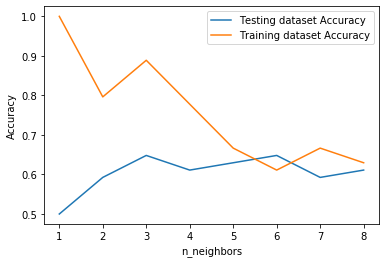

In [254]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
#Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [255]:
y_pred_KNN = knn.predict(X_test)

In [256]:
print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred_KNN))
print ("Accuracy : ",
    accuracy_score(y_test,y_pred_KNN)*100)

knn_score=accuracy_score(y_test,y_pred_KNN)*100

print("Report : \n",
    classification_report(y_test, y_pred_KNN))

Confusion Matrix: 
 [[ 3  2  1  1  0  0]
 [ 2  1  1  0  0  0]
 [ 0  2  1  0  0  0]
 [ 3  4  0 19  0  0]
 [ 1  1  0  2  0  1]
 [ 0  0  0  0  0  9]]
Accuracy :  61.111111111111114
Report : 
               precision    recall  f1-score   support

           0       0.33      0.43      0.38         7
           1       0.10      0.25      0.14         4
           2       0.33      0.33      0.33         3
           4       0.86      0.73      0.79        26
           5       0.00      0.00      0.00         5
           6       0.90      1.00      0.95         9

    accuracy                           0.61        54
   macro avg       0.42      0.46      0.43        54
weighted avg       0.63      0.61      0.62        54



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [257]:
knn_cv = np.mean(cross_val_score(knn, X, Y, cv=10) * 100)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


# Summary of Results

In [258]:
df_results = pd.DataFrame.from_dict({
    'Regular - Accuracy Score':{'KNN':knn_score, 'Decision Tree':max(dtree_score[0],dtree_score[1]), 'Naive Bayes':nb_score},
'Cross-Validation Score':{'KNN':knn_cv, 'Decision Tree':max(dtree_cv[0],dtree_cv[1]), 'Naive Bayes':nb_cv}})
df_results

,Regular - Accuracy Score,Cross-Validation Score
Decision Tree,70.370370,63.235237
KNN,61.111111,64.621018
Naive Bayes,40.740741,32.152292
